## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.tree import DecisionTreeClassifier
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock=pd.read_csv("DataFrame.csv")
stock_1 = pd.read_csv("MSFT.csv")
merge = pd.read_csv("merge_df.csv") 

This notebook is purely concerned with first task: Predict whether graph wil go up or down in next minute . For other tasks Data Cleaning or Visualizations or Modelling may change according to need.

In DataFrame we had 22,805 entries and in MSFT 8,857 entries with same columns = [['open','low','high','close']] . So for current task 1 which is to predict whether graph will go up or down in every minute I merged these data in merged_df in order to train and test model with more data and achieve more accuracy . 

Also, I didn't used much of visualization as column values are so close to each other that smaller diffrences or patterns can't be seen , Visualization didn't inferred much in this case. 

## Stock(DataFrame.csv) data cleaning

In [3]:
stock.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y%m%d') 

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Type        22805 non-null  object        
 1   Date        22805 non-null  datetime64[ns]
 2   Time        22805 non-null  object        
 3   open        22805 non-null  float64       
 4   high        22805 non-null  float64       
 5   low         22805 non-null  float64       
 6   close       22805 non-null  float64       
 7   Unnamed: 7  0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.4+ MB


In [6]:
stock['Type'].unique()

array(['NIFTY'], dtype=object)

In [7]:
stock=stock.drop(columns=['Unnamed: 7'])

In [8]:
replace_map = {'day_of_week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday':5, 'Saturday':6, 'Sunday':7}}

In [9]:
stock['day_of_week'] = stock['Date'].dt.day_name()
stock.replace(replace_map, inplace=True)

In [10]:
stock['Time'].unique()

array(['09:16', '09:17', '09:18', '09:19', '09:20', '09:21', '09:22',
       '09:23', '09:24', '09:25', '09:26', '09:27', '09:28', '09:29',
       '09:30', '09:31', '09:32', '09:33', '09:34', '09:35', '09:36',
       '09:37', '09:38', '09:39', '09:40', '09:41', '09:42', '09:43',
       '09:44', '09:45', '09:46', '09:47', '09:48', '09:49', '09:50',
       '09:51', '09:52', '09:53', '09:54', '09:55', '09:56', '09:57',
       '09:58', '09:59', '10:00', '10:01', '10:02', '10:03', '10:04',
       '10:05', '10:06', '10:07', '10:08', '10:09', '10:10', '10:11',
       '10:12', '10:13', '10:14', '10:15', '10:16', '10:17', '10:18',
       '10:19', '10:20', '10:21', '10:22', '10:23', '10:24', '10:25',
       '10:26', '10:27', '10:28', '10:29', '10:30', '10:31', '10:32',
       '10:33', '10:34', '10:35', '10:36', '10:37', '10:38', '10:39',
       '10:40', '10:41', '10:42', '10:43', '10:44', '10:45', '10:46',
       '10:47', '10:48', '10:49', '10:50', '10:51', '10:52', '10:53',
       '10:54', '10:

In [11]:
stock['Time']=stock['Time'].str.split(':').str.get(0).astype(int)*3600+stock['Time'].str.split(':').str.get(1).astype(int)

In [12]:
stock.head()

,Type,Date,Time,open,high,low,close,day_of_week
0,NIFTY,2021-01-01,32416,13997.90,14020.85,13991.35,14013.15,5
1,NIFTY,2021-01-01,32417,14014.85,14018.55,14008.15,14009.05,5
2,NIFTY,2021-01-01,32418,14008.05,14013.10,14005.05,14012.70,5
3,NIFTY,2021-01-01,32419,14013.65,14019.10,14013.65,14016.20,5
4,NIFTY,2021-01-01,32420,14015.45,14017.80,14011.95,14015.45,5


In [13]:
stock['up/down'] = (stock['open']-stock['close']>0)
stock['up/down'].replace(False,"1",inplace=True)
stock['up/down'].replace(True,"0",inplace=True)
stock['up/down']=stock['up/down'].astype(int)
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         22805 non-null  object        
 1   Date         22805 non-null  datetime64[ns]
 2   Time         22805 non-null  int32         
 3   open         22805 non-null  float64       
 4   high         22805 non-null  float64       
 5   low          22805 non-null  float64       
 6   close        22805 non-null  float64       
 7   day_of_week  22805 non-null  int64         
 8   up/down      22805 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(1)
memory usage: 1.4+ MB


In [14]:
stock.head()

,Type,Date,Time,open,high,low,close,day_of_week,up/down
0,NIFTY,2021-01-01,32416,13997.90,14020.85,13991.35,14013.15,5,1
1,NIFTY,2021-01-01,32417,14014.85,14018.55,14008.15,14009.05,5,0
2,NIFTY,2021-01-01,32418,14008.05,14013.10,14005.05,14012.70,5,1
3,NIFTY,2021-01-01,32419,14013.65,14019.10,14013.65,14016.20,5,1
4,NIFTY,2021-01-01,32420,14015.45,14017.80,14011.95,14015.45,5,1


In [15]:
merge['Date'] = pd.to_datetime(merge['Date'], infer_datetime_format=True)

In [16]:
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y%m%d')

In [17]:
stock.head()

,Type,Date,Time,open,high,low,close,day_of_week,up/down
0,NIFTY,2021-01-01,32416,13997.90,14020.85,13991.35,14013.15,5,1
1,NIFTY,2021-01-01,32417,14014.85,14018.55,14008.15,14009.05,5,0
2,NIFTY,2021-01-01,32418,14008.05,14013.10,14005.05,14012.70,5,1
3,NIFTY,2021-01-01,32419,14013.65,14019.10,14013.65,14016.20,5,1
4,NIFTY,2021-01-01,32420,14015.45,14017.80,14011.95,14015.45,5,1


In [18]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         22805 non-null  object        
 1   Date         22805 non-null  datetime64[ns]
 2   Time         22805 non-null  int32         
 3   open         22805 non-null  float64       
 4   high         22805 non-null  float64       
 5   low          22805 non-null  float64       
 6   close        22805 non-null  float64       
 7   day_of_week  22805 non-null  int64         
 8   up/down      22805 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(1)
memory usage: 1.4+ MB


In [19]:
stock.corr()

,Time,open,high,low,close,day_of_week,up/down
Time,1.000000,-0.014604,-0.014598,-0.013861,-0.014444,0.000158,0.017369
open,-0.014604,1.000000,0.999926,0.999912,0.999837,-0.035856,-0.014271
high,-0.014598,0.999926,1.000000,0.999893,0.999927,-0.035993,-0.007613
low,-0.013861,0.999912,0.999893,1.000000,0.999932,-0.036092,-0.007153
close,-0.014444,0.999837,0.999927,0.999932,1.000000,-0.036100,-0.001496
day_of_week,0.000158,-0.035856,-0.035993,-0.036092,-0.036100,1.000000,-0.009832
up/down,0.017369,-0.014271,-0.007613,-0.007153,-0.001496,-0.009832,1.000000


Text(0, 0.5, 'Stock Close price')

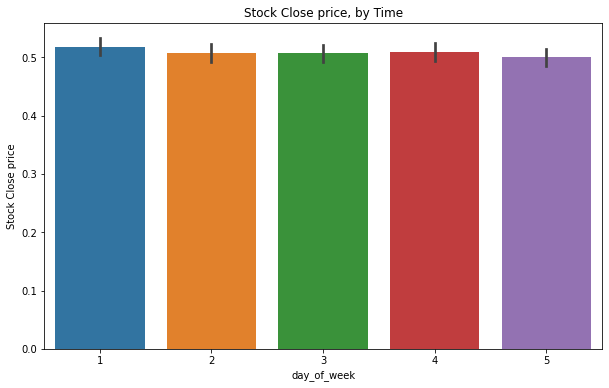

In [20]:
plt.figure(figsize=(10,6))
plt.title("Stock Close price, by Time")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=stock['day_of_week'], y=stock['up/down'])

# Add label for vertical axis
plt.ylabel("Stock Close price")

<AxesSubplot:xlabel='up/down', ylabel='day_of_week'>

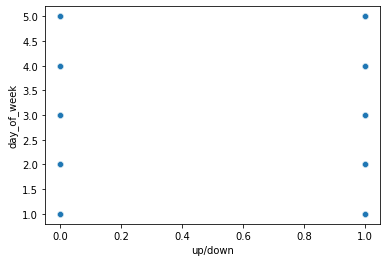

In [21]:
sns.scatterplot(x=stock['up/down'], y=stock['day_of_week'])

## Stock_1(MSFT.csv) Cleaning

In [22]:
stock_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [23]:
stock_1['Date'] = pd.to_datetime(stock_1['Date'], infer_datetime_format=True)

In [24]:
stock_1['day_of_week'] = stock_1['Date'].dt.day_name()
stock_1.replace(replace_map, inplace=True)

In [25]:
stock_1['up/down'] = (stock_1['Open']-stock_1['Close']>0)
stock_1['up/down'].replace(False,"1",inplace=True)
stock_1['up/down'].replace(True,"0",inplace=True)
stock_1['up/down']=stock_1['up/down'].astype(int)

In [26]:
stock_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8857 non-null   datetime64[ns]
 1   Open         8857 non-null   float64       
 2   High         8857 non-null   float64       
 3   Low          8857 non-null   float64       
 4   Close        8857 non-null   float64       
 5   Adj Close    8857 non-null   float64       
 6   Volume       8857 non-null   int64         
 7   day_of_week  8857 non-null   int64         
 8   up/down      8857 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 588.3 KB


In [27]:
stock_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,up/down
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,4,1
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,5,1
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1,1
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,2,0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,3,0


In [28]:
stock_1.corr()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,up/down
Open,1.000000,0.999916,0.999911,0.999832,0.995506,-0.299034,-0.000523,0.000807
High,0.999916,1.000000,0.999861,0.999904,0.995460,-0.296961,-0.000695,0.004749
Low,0.999911,0.999861,1.000000,0.999915,0.995702,-0.301166,-0.000728,0.005356
Close,0.999832,0.999904,0.999915,1.000000,0.995680,-0.299194,-0.000742,0.009365
Adj Close,0.995506,0.995460,0.995702,0.995680,1.000000,-0.303573,-0.000867,0.012433
Volume,-0.299034,-0.296961,-0.301166,-0.299194,-0.303573,1.000000,0.051932,-0.020573
day_of_week,-0.000523,-0.000695,-0.000728,-0.000742,-0.000867,0.051932,1.000000,-0.027680
up/down,0.000807,0.004749,0.005356,0.009365,0.012433,-0.020573,-0.027680,1.000000


## Merge(merge_df) cleaning

In [29]:
merge.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [30]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Type    22805 non-null  object        
 1   Date    31662 non-null  datetime64[ns]
 2   Time    22805 non-null  object        
 3   open    31662 non-null  float64       
 4   high    31662 non-null  float64       
 5   low     31662 non-null  float64       
 6   close   31662 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.7+ MB


In [31]:
merge['Date'] = pd.to_datetime(merge['Date'], infer_datetime_format=True)
merge['day_of_week'] = merge['Date'].dt.day_name()

In [32]:
replace_map = {'day_of_week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday':5, 'Saturday':6, 'Sunday':7}}

In [33]:
merge.replace(replace_map, inplace=True)

In [34]:
merge['up/down'] = (merge['open']-merge['close']>0)
merge['up/down'].replace(False,"1",inplace=True)
merge['up/down'].replace(True,"0",inplace=True)
merge['up/down']=merge['up/down'].astype(int)

In [35]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         22805 non-null  object        
 1   Date         31662 non-null  datetime64[ns]
 2   Time         22805 non-null  object        
 3   open         31662 non-null  float64       
 4   high         31662 non-null  float64       
 5   low          31662 non-null  float64       
 6   close        31662 non-null  float64       
 7   day_of_week  31662 non-null  int64         
 8   up/down      31662 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(2)
memory usage: 2.1+ MB


In [36]:
merge.head()

,Type,Date,Time,open,high,low,close,day_of_week,up/down
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,5,1
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,5,0
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,5,1
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,5,1
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,5,1


In [37]:
merge.corr()

,open,high,low,close,day_of_week,up/down
open,1.000000,0.999993,0.999994,0.999993,-0.112465,-0.461756
high,0.999993,1.000000,1.000000,1.000000,-0.112467,-0.461455
low,0.999994,1.000000,1.000000,1.000000,-0.112473,-0.461433
close,0.999993,1.000000,1.000000,1.000000,-0.112472,-0.461181
day_of_week,-0.112465,-0.112467,-0.112473,-0.112472,1.000000,0.044405
up/down,-0.461756,-0.461455,-0.461433,-0.461181,0.044405,1.000000


### Collecting dependent & independent attributes in numpy array

In [38]:
df = merge[['open','close']]
X = np.asarray(df)

In [39]:
dff = merge[['up/down']]
y = np.asarray(dff)

# Modelling

## SVM

In [40]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (25329, 2) (25329, 1)
Test set: (6333, 2) (6333, 1)


In [41]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

C:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [42]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 0, 1, 1])

### Confusion Matrix

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2241
           1       1.00      1.00      1.00      4092

    accuracy                           1.00      6333
   macro avg       1.00      1.00      1.00      6333
weighted avg       1.00      1.00      1.00      6333

Confusion matrix, without normalization
[[4092    0]
 [  11 2230]]


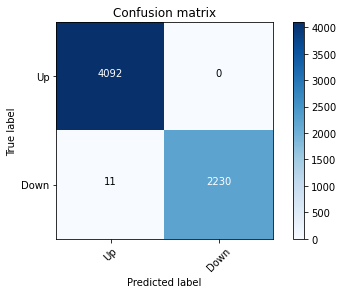

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Up','Down'],normalize= False,  title='Confusion matrix')

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.998262095515859

In [47]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9973190348525469

In [48]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,yhat))

Accuracy:  0.998263066477183


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.9924033049761771

## Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (25329, 2) (25329, 1)
Test set: (6333, 2) (6333, 1)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train,y_train)
LR

C:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.001)

In [52]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, ..., 1, 0, 0])

### Confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2241
           1       0.99      0.99      0.99      4092

    accuracy                           0.99      6333
   macro avg       0.99      0.99      0.99      6333
weighted avg       0.99      0.99      0.99      6333

Confusion matrix, without normalization
[[4070   22]
 [  39 2202]]


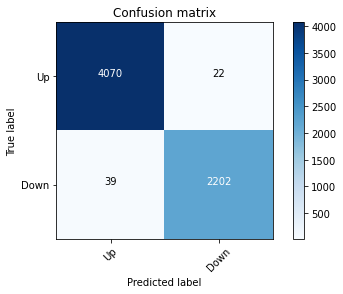

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Up','Down'],normalize= False,  title='Confusion matrix')

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9852335996126845

In [55]:
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.09177605250343855

In [56]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,yhat))

Accuracy:  0.9903679141007421


In [57]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.990359560804854

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.9578728730497095

## Decison Tree

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (25329, 2) (25329, 1)
Test set: (6333, 2) (6333, 1)


In [60]:
stockTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
stockTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [61]:
stockTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [62]:
yhat = stockTree.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.02      0.04      2241
           1       0.65      1.00      0.79      4092

    accuracy                           0.65      6333
   macro avg       0.77      0.51      0.41      6333
weighted avg       0.74      0.65      0.52      6333

Confusion matrix, without normalization
[[4087    5]
 [2199   42]]


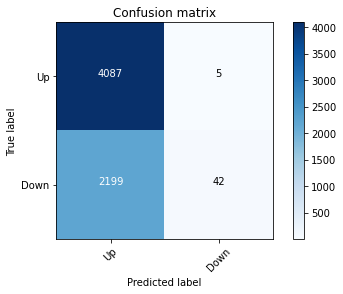

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Up','Down'],normalize= False,  title='Confusion matrix')

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,yhat))

DecisionTrees's Accuracy:  0.6519816832464866


In [65]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5219085610655423

## K Nearest Neighbours

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [68]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9813652335267875
Test set Accuracy:  0.6519816832464866


## Calculate for other values of k

In [69]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0.97, 0.96, 0.97, 0.97, 0.97, 0.96, 0.97, 0.96, 0.96])

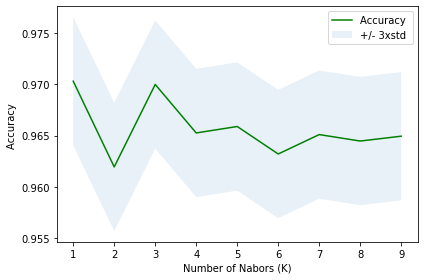

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [71]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9703142270645824 with k= 1


In [72]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2241
           1       0.97      0.97      0.97      4092

    accuracy                           0.96      6333
   macro avg       0.96      0.96      0.96      6333
weighted avg       0.96      0.96      0.96      6333

Confusion matrix, without normalization
[[3985  107]
 [ 115 2126]]


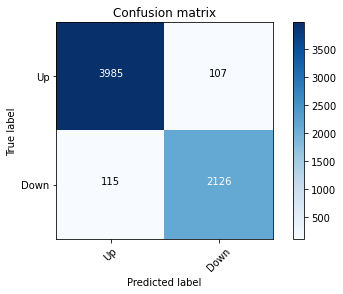

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Up','Down'],normalize= False,  title='Confusion matrix')

In [74]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9472308057998574

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.8466848822464834

## Xgboost

In [76]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000,n_jobs=4)
my_model.fit(X_train, y_train,early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
yhat = my_model.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.8359867519385247

## We used 4 algorithm to predict whether graph will go up or down with accuracy as:

#### Using attributes as : 'open', 'close'

#### Using attributes as : 'open', 'close', 'day_of_week'

### So, the best accuray we got by using SVM(Linear) model with r2_score as 0.99 tested over 6,333 rows of data and trained with 25,329 rows usinf attributes as 'open' and 'close'